# Chapter 3 - Exercises

### [Link](https://runestone.academy/runestone/books/published/pythonds3/AlgorithmAnalysis/Exercises.html)

### 1. Devise an experiment to verify that the list index operator is 𝑂(1)

One way to check whether or not the index operator is $O(1)$ is to create different lists with different sizes (in increasing order) and see that the time taken to access an index is independent on the size itself. To achieve so, let us first create an helper function which generates lists of different sizes.

In [108]:
import random

def make_list(n):
    return [random.randint(0, n) for _ in range(n)]

def make_lists_in_magnitude(base, power):
    return [make_list(base ** i) for i in range(1, power + 1)]

Now, we can start the experiment by importing the `time` module, together with `numpy` and `pandas` to do the appropriate data analyses. We are going to define modules which will perform the appropriate sampling and analyses by themselves.

In [110]:
import time 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def average_by_n(base, power):
    lists = make_lists_in_magnitude(base, power)
    averages = []
    
    for ls in lists:
        access_times = []
        
        for i in range(len(ls)):
            s = time.time()
            v = ls[i]
            e = time.time() 
            
            access_times += [e - s]
        
        averages += [np.array(access_times).mean()]

    return np.array(averages)

And now, we can experiment with different `n` and see how speed changes. We can set a rather big step size so that we do not make the experiment long and/or heavy.

[]

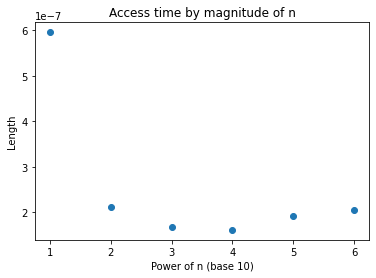

In [116]:
averages = average_by_n(10, 6)

plt.xlabel("Power of n (base 10)")
plt.ylabel("Length")
plt.title("Access time by magnitude of n")
plt.scatter(np.arange(1, len(averages) + 1), averages)
plt.plot()

Even if such an experiment is not fully exhaustive to get conclusions in a real setting, we can easily see how changing the order of magnitude for n, the average access time is not affected. In order to be fully, one can run the previous cell different time and see that:

* There is definitely variance, but it is definitely less than microseconds, and this tells us access time hardly varies.
* In the x axis we have the power to which 10 is raised, and in the y axis we have the time in seconds it took to complete, in average, access to any element in the array by index. We can see that the average access time does not change on average.

### 2. Devise an experiment to verify that get item and set item are 𝑂(1) for dictionaries.

We can proceed in the same way we did for the previous exercise. This time, we have to create specific helper methods to generate dictionaries with an increasing number of keys. For semplicity, we will keep the length of keys variable between some sort of range, as well as the value of those keys.

In [140]:
def make_dict(n):
    chars = [chr(w) for w in range(ord("A"), ord("z")) if chr(w).isalpha()]
    n_chars = len(chars)
    
    return {"".join(random.sample(chars, n_chars)[:i]):  
            "".join(random.sample(chars, n_chars)[-j:])
            for (i, j) in zip(random.choices(range(n_chars), k=n), random.choices(range(n_chars), k=n))}

def make_dicts_to_magnitude(base, power):
    return [make_dict(base ** i) for i in range(1, power + 1)]


Now we can proceed to create a method to get a vector of averages.

In [144]:
def average_by_n_dict(base, power):
    dicts = make_dicts_to_magnitude(base, power)
    averages_get = []
    averages_set = []
    
    for d in dicts:
        access_times_get = []
        access_times_set = []
        
        for k in d.keys():
            s = time.time()
            v = d[k]
            e = time.time() 
            
            access_times_get += [e - s]

            s = time.time()
            d[k] = v + " "
            e = time.time() 

            access_times_set += [e - s]
        
        averages_get += [np.array(access_times_get).mean()]
        averages_set += [np.array(access_times_set).mean()]

    return np.array(averages_get), np.array(averages_set)
    

Let's now get the averages using dictionaries ranging from 10 to a million (of course, we are just picking six of them, representing the different magnitudes).

__Warning!__
Depending on the input values, the function may take a while to compute!

In [145]:
averages_get, averages_set = average_by_n_dict(10, 6)

Let's now see how the two dictionary operations performed!

[]

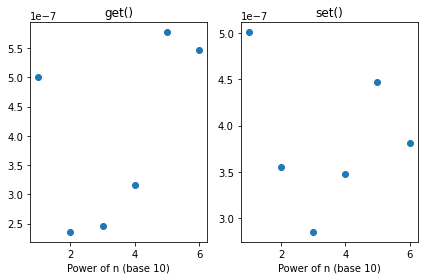

In [158]:
plt.subplot(1, 2, 1)
plt.title("get()")
plt.xlabel("Power of n (base 10)")
plt.scatter(np.arange(1, len(averages_get) + 1), averages_get)
plt.subplot(1, 2, 2)
plt.title("set()")
plt.xlabel("Power of n (base 10)")
plt.scatter(np.arange(1, len(averages_set) + 1), averages_set)

plt.tight_layout()

plt.plot()


Even here, we can see how the time is distributed within a standard deviation which is less than a microsecond, no matter the size. We infer from this fact, `get()` and `set()` take constant time to finish.

### 3. Devise an experiment that compares the performance of the `del` operator on lists and dictionaries.

Let's try